In [145]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
import os
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

from keras import models
from keras import layers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from shutil import copy2

from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model
from sklearn.model_selection import train_test_split


np.random.seed(123)


In [ ]:
# # Set up data into train and test directories with folders of bobcat and not_bobcat
# train_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/'#348 bobcat, 340 not_bobcat
# test_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/'#348 bobcat, 340 not_bobcat



# train_data_dir = '/Users/j.markdaniels/Desktop/Data/multiclass/train/'
# test_data_dir = '/Users/j.markdaniels/Desktop/Data/multiclass/test/'

# test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         test_data_dir, 
#         target_size=(128, 128), batch_size=340)

# train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         train_data_dir, 
#         target_size=(128, 128), batch_size=340)

# # create the data sets
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)

# train_generator.classes

# get all the data in the directory split/test, and reshape them

In [186]:
data_te = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Desktop/Data/multiclass/test/', 
        target_size=(224, 224), 
        batch_size = 2776, 
        class_mode='categorical',
        seed = 123)

data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Desktop/Data/multiclass/train/', 
        target_size=(224, 224), 
        batch_size = 340, 
        class_mode='categorical',
        seed = 123) 

labels_tr.shape

Found 2776 images belonging to 20 classes.
Found 11179 images belonging to 20 classes.


(340, 20)

In [154]:
#split images and labels
images_tr, labels_tr = next(data_tr)

/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 85 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 93 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 141 bytes but only got 0. Skipping tag 37386
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 149 bytes but only got 0. Skipping tag 37381
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read

/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [155]:
#split images and labels
images_te, labels_te = next(data_te)

In [156]:
# images = np.concatenate((images_tr, images_te))

In [157]:
# labels_tr

In [158]:
#labels = np.concatenate((labels_tr, labels_te), axis =0 )

In [159]:
#labels.shape

In [160]:
# X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [161]:
X_train, X_val, y_train, y_val = train_test_split(images_tr, labels_tr, test_size=0.20, random_state=123)

In [162]:
y_test  = labels_te

In [163]:
y_test.shape

(2776, 20)

In [164]:
X_test = images_te

In [187]:
X_test.shape

(2776, 224, 224, 3)

In [188]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(20,activation='softmax')) #final layer with softmax activation

In [189]:
for i,layer in enumerate(imagenet.layers):
  print(i,layer.name, layer.trainable)

0 input_5 False
1 conv2d_377 True
2 batch_normalization_377 True
3 activation_377 True
4 conv2d_378 True
5 batch_normalization_378 True
6 activation_378 True
7 conv2d_379 True
8 batch_normalization_379 True
9 activation_379 True
10 max_pooling2d_17 True
11 conv2d_380 True
12 batch_normalization_380 True
13 activation_380 True
14 conv2d_381 True
15 batch_normalization_381 True
16 activation_381 True
17 max_pooling2d_18 True
18 conv2d_385 True
19 batch_normalization_385 True
20 activation_385 True
21 conv2d_383 True
22 conv2d_386 True
23 batch_normalization_383 True
24 batch_normalization_386 True
25 activation_383 True
26 activation_386 True
27 average_pooling2d_37 True
28 conv2d_382 True
29 conv2d_384 True
30 conv2d_387 True
31 conv2d_388 True
32 batch_normalization_382 True
33 batch_normalization_384 True
34 batch_normalization_387 True
35 batch_normalization_388 True
36 activation_382 True
37 activation_384 True
38 activation_387 True
39 activation_388 True
40 mixed0 True
41 conv2d_3

In [70]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 True
1 global_average_pooling2d_4 True
2 dense_13 True
3 dense_14 True
4 dense_15 True
5 dense_16 True


In [71]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [72]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 False
1 global_average_pooling2d_4 True
2 dense_13 True
3 dense_14 True
4 dense_15 True
5 dense_16 True


In [185]:
y_val.shape

(68, 20)

In [132]:
new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=60,
          validation_data=(X_val, y_val))

Train on 435 samples, validate on 109 samples
Epoch 1/100
435/435 [==============================] - 56s 128ms/step - loss: 0.3111 - acc: 0.8920 - val_loss: 3.0882 - val_acc: 0.6147
Epoch 2/100
435/435 [==============================] - 36s 83ms/step - loss: 0.3347 - acc: 0.8989 - val_loss: 2.3989 - val_acc: 0.5963
Epoch 3/100
435/435 [==============================] - 36s 83ms/step - loss: 0.1576 - acc: 0.9609 - val_loss: 2.7731 - val_acc: 0.6239
Epoch 4/100
435/435 [==============================] - 36s 83ms/step - loss: 0.1194 - acc: 0.9609 - val_loss: 2.9539 - val_acc: 0.6055
Epoch 5/100
435/435 [==============================] - 36s 84ms/step - loss: 0.2217 - acc: 0.9517 - val_loss: 2.5764 - val_acc: 0.6330
Epoch 6/100
435/435 [==============================] - 36s 84ms/step - loss: 0.1123 - acc: 0.9609 - val_loss: 2.7121 - val_acc: 0.6514
Epoch 7/100
435/435 [==============================] - 37s 84ms/step - loss: 0.0318 - acc: 0.9885 - val_loss: 3.1490 - val_acc: 0.6239
Epoch 8/

Epoch 61/100
435/435 [==============================] - 37s 84ms/step - loss: 0.0605 - acc: 0.9908 - val_loss: 3.5538 - val_acc: 0.6239
Epoch 62/100
435/435 [==============================] - 38s 86ms/step - loss: 0.0432 - acc: 0.9839 - val_loss: 2.9683 - val_acc: 0.6697
Epoch 63/100
435/435 [==============================] - 37s 86ms/step - loss: 0.0101 - acc: 0.9954 - val_loss: 3.2062 - val_acc: 0.6422
Epoch 64/100
435/435 [==============================] - 37s 85ms/step - loss: 0.0142 - acc: 0.9954 - val_loss: 3.1446 - val_acc: 0.6330
Epoch 65/100
435/435 [==============================] - 36s 84ms/step - loss: 0.0120 - acc: 0.9954 - val_loss: 3.7499 - val_acc: 0.6239
Epoch 66/100
435/435 [==============================] - 36s 83ms/step - loss: 0.0597 - acc: 0.9793 - val_loss: 3.3489 - val_acc: 0.6514
Epoch 67/100
435/435 [==============================] - 36s 83ms/step - loss: 0.0344 - acc: 0.9839 - val_loss: 2.9647 - val_acc: 0.6881
Epoch 68/100
435/435 [==========================

In [133]:
new_model.evaluate(X_test, y_test)

136/136 [==============================] - 10s 74ms/step


[2.8500960293938133, 0.7058823529411765]

In [165]:
predictions_transfer = new_model.predict(X_test)
# predictions_transfer = np.around(predictions_transfer)

## Confusion Matrix from Hot Dog/Not Hot Dog

In [166]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [167]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['virginia_opossum',
 'raccoon',
 'coyote',
 'red_fox',
 'bald_eagle',
 'seals',
 'canada_lynx',
 'elk',
 'black_bear',
 'raven',
 'nutria',
 'gray_fox',
 'bobcat',
 'ringtail',
 'gray_wolf',
 'mountain_beaver',
 'sea_lions',
 'deer',
 'cougar',
 'columbian_black-tailed_deer'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

<Figure size 432x288 with 0 Axes>

## Jon's Confusion Matrix

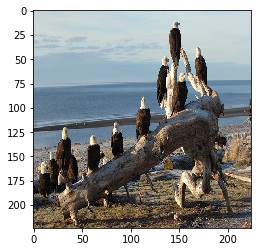

In [106]:
plt.imshow(X_test[0])

In [27]:
somevariable = ['seals',
 'canada_lynx',
 'elk',
 'black_bear',
 'raven',
 'nutria',
 'gray_fox',
 'bobcat',
 'ringtail',
 'gray_wolf',
 'mountain_beaver',
 'sea_lions',
 'deer',
 'cougar',
 'columbian_black-tailed_deer']
print(somevariable)

['seals', 'canada_lynx', 'elk', 'black_bear', 'raven', 'nutria', 'gray_fox', 'bobcat', 'ringtail', 'gray_wolf', 'mountain_beaver', 'sea_lions', 'deer', 'cougar', 'columbian_black-tailed_deer']


In [182]:
y_pred = np.argmax(predictions_transfer, axis=1)

In [183]:
y_true = np.where(y_test != 0)[1]

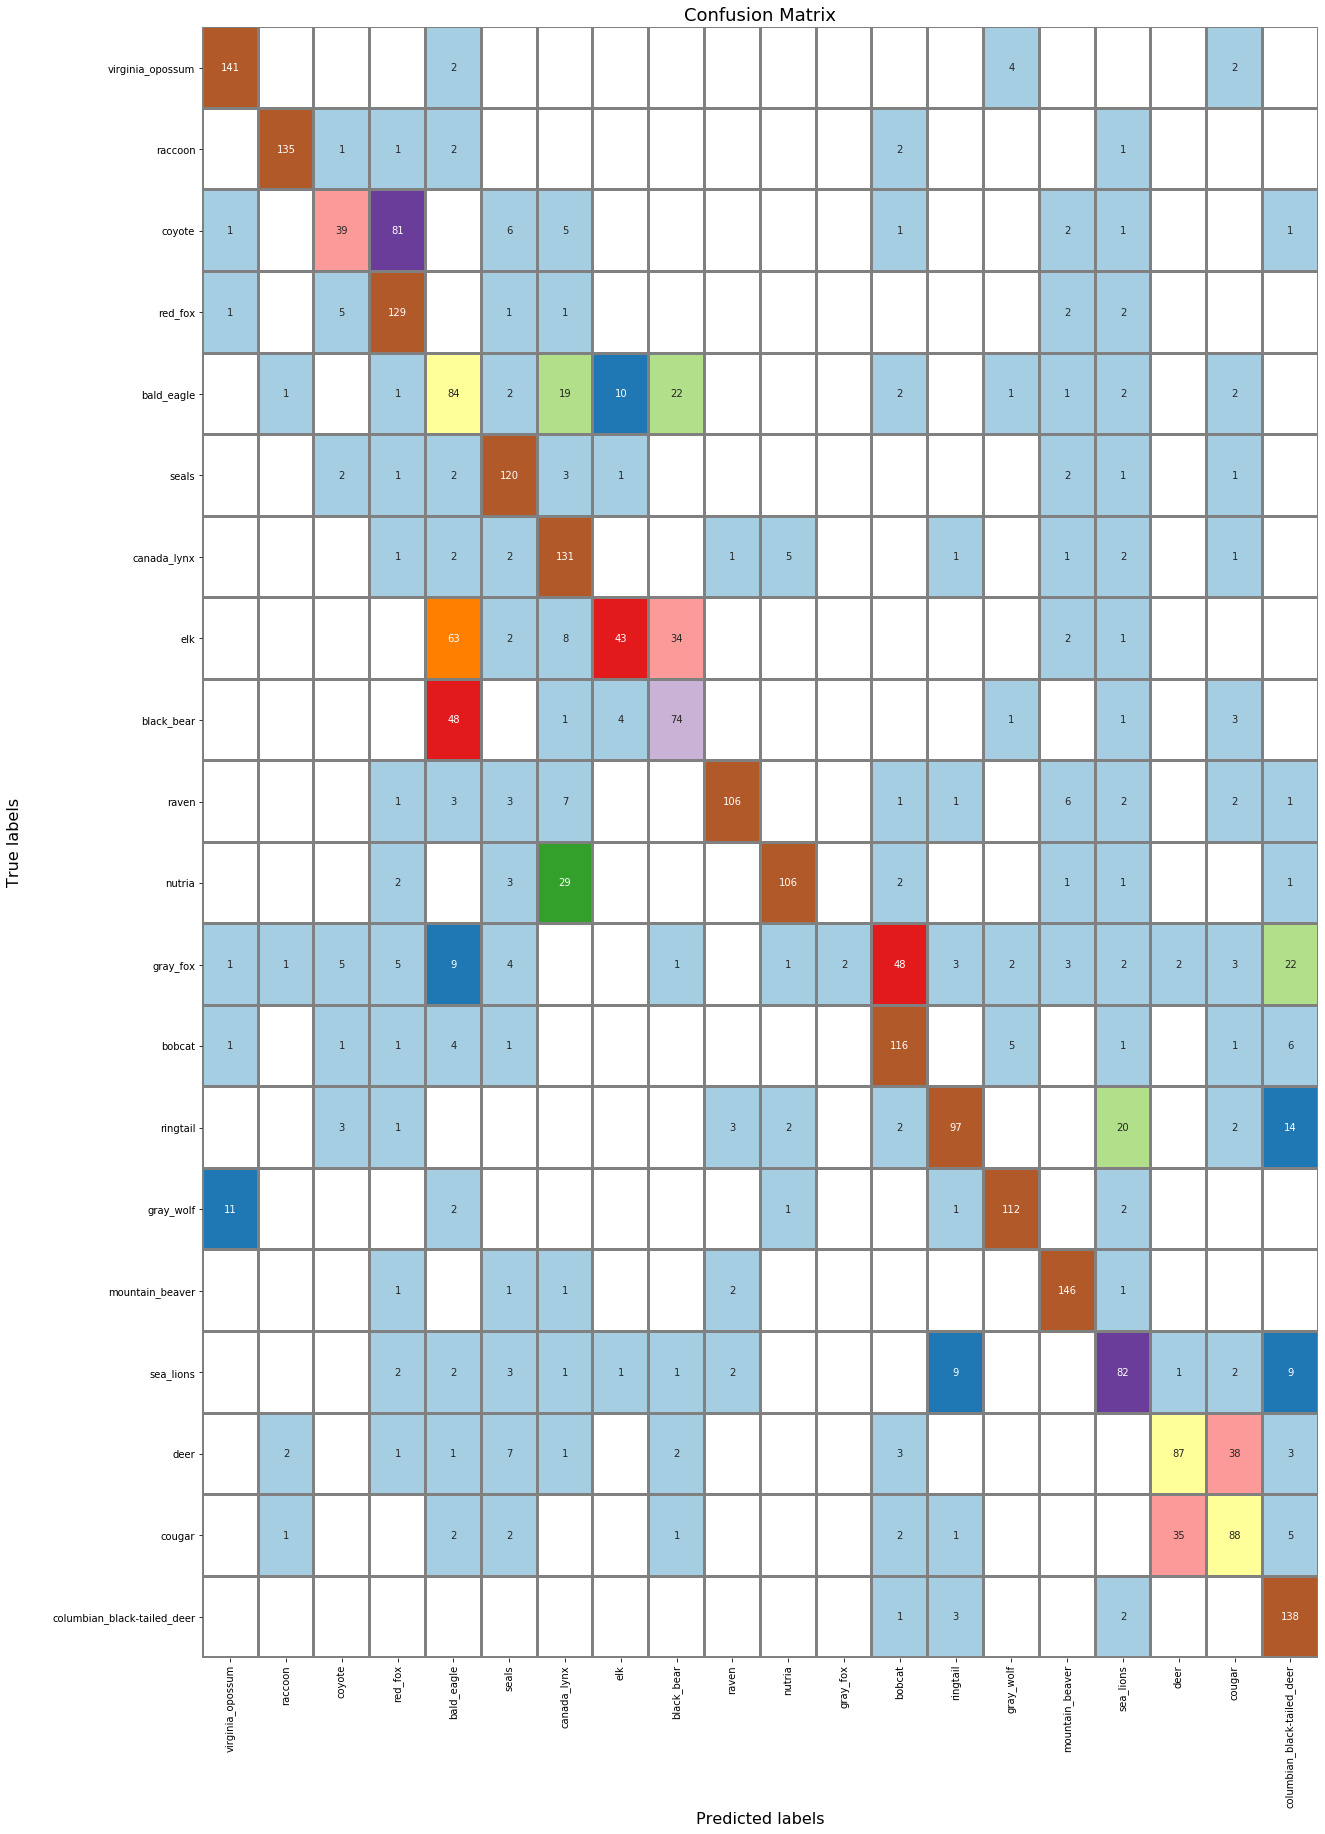

In [172]:
labels = ['virginia_opossum','raccoon','coyote','red_fox','bald_eagle', 'seals', 'canada_lynx', 'elk', 'black_bear', 'raven', 'nutria', 'gray_fox', 'bobcat', 'ringtail', 'gray_wolf', 'mountain_beaver', 'sea_lions', 'deer', 'cougar', 'columbian_black-tailed_deer']
# Calculate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
# classes = classes[unique_labels(y_true, y_pred)]
# Figure adjustment and heatmap plot
f = plt.figure(figsize=(20,30))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, vmax=100, cbar=False, cmap='Paired', mask=(cm==0), fmt=',.0f', linewidths=2, linecolor='grey', ); 

# labels
ax.set_xlabel('Predicted labels', fontsize=16);
ax.set_ylabel('True labels', labelpad=30, fontsize=16); 
ax.set_title('Confusion Matrix', fontsize=18); 
ax.xaxis.set_ticklabels(labels, rotation=90); 
ax.yaxis.set_ticklabels(labels, rotation=0);
ax.set_facecolor('white')







In [23]:
# hist_new_model = new_model.history
# loss_values = hist_new_model['loss']
# val_loss_values = hist_new_model['val_loss']
# acc_values = hist_new_model['acc'] 
# val_acc_values = hist_new_model['val_acc']


# epochs = range(1, len(loss_values) + 1)

# plt.figure(figsize=(15,4))
# plt.subplot(121)
# plt.plot(epochs, loss_values, 'g.', label='Training loss')
# plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(122)
# plt.plot(epochs, acc_values, 'r.', label='Training acc')
# plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

TypeError: 'History' object is not subscriptable

In [24]:
# results_train = new_model.evaluate(X_train, y_train)
# results_test = new_model.evaluate(X_test, y_test)
# print(results_train, results_test)

136/136 [==============================] - 15s 112ms/step
[0.0026334957740129896, 1.0] [0.23705798681199125, 0.9852941176470589]


In [25]:
# predictions_transfer = new_model.predict(X_test)
# predictions_transfer = np.around(predictions_transfer)

In [179]:
from keras import metrics

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.mae, metrics.categorical_accuracy])

In [180]:
from keras.metrics import top_k_categorical_accuracy

In [184]:
top_k_categorical_accuracy(y_true, y_pred, k=5)

ValueError: Shape must be rank 2 but is rank 1 for 'in_top_k_2/InTopKV2' (op: 'InTopKV2') with input shapes: [2776], [], [].

In [173]:
new_model.save('inception_multiple_classes.h5')